In [ ]:
!pip install missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcdefaults()

In [ ]:
data = pd.read_csv("predictive_maintenance.csv")

In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
data.columns = ['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'Failure type']

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature,10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure type,10000,6,No Failure,9652


###DATA ANALYSIS

In [ ]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']
cat_cols = ['Type', 'Failure type']
label = 'Machine failure'

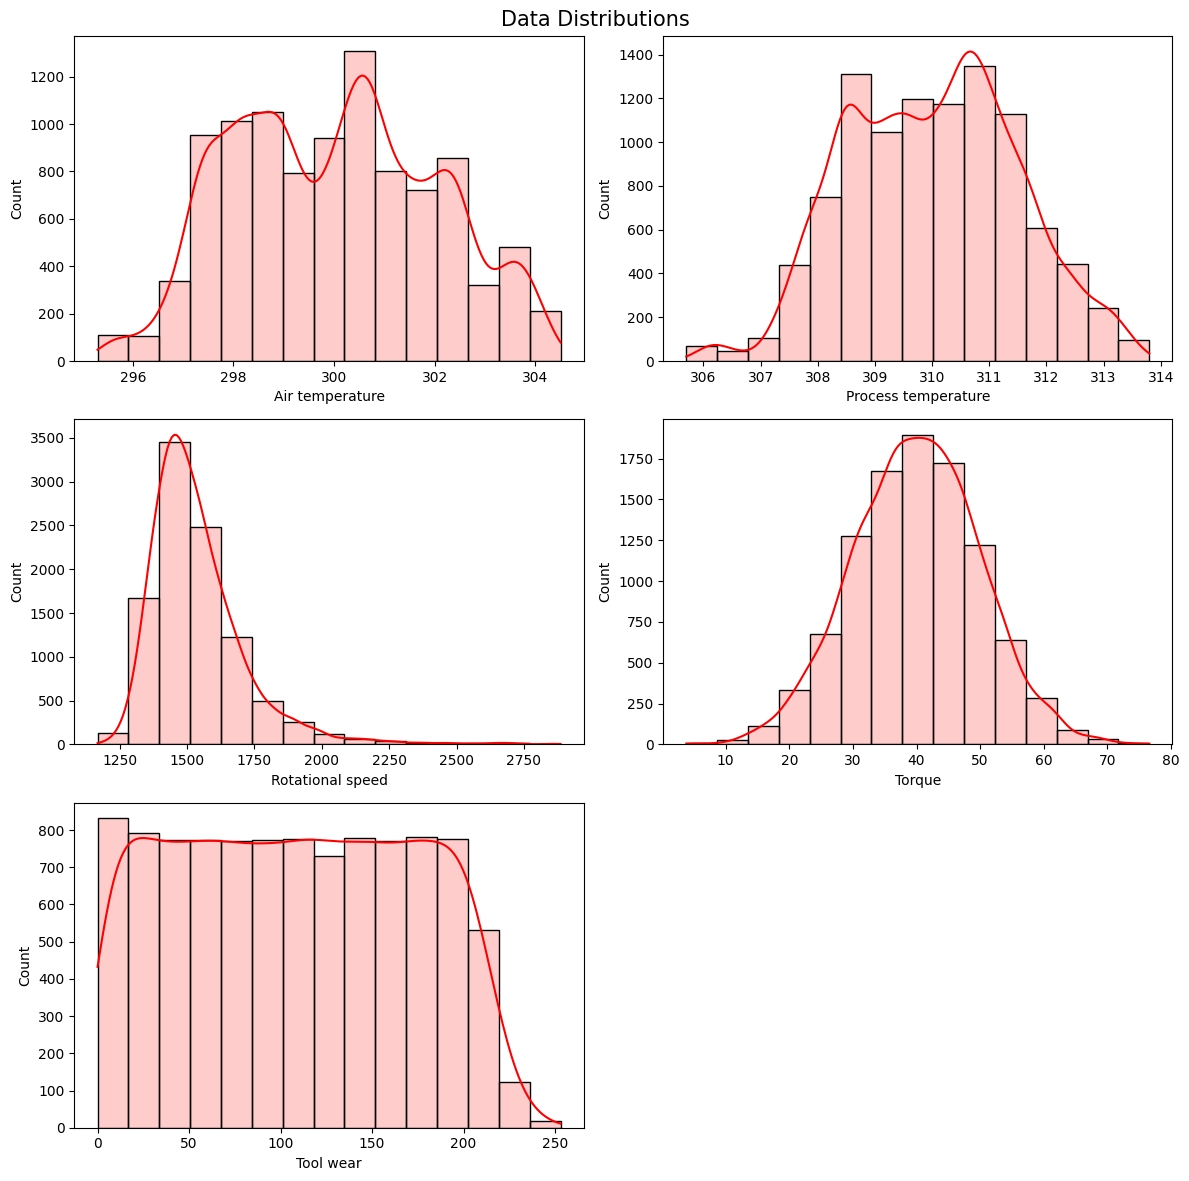

In [ ]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data, x = col, kde = True, alpha = 0.2, color = 'red', bins = 15)
plt.suptitle("Data Distributions", fontsize = 15)
plt.tight_layout()
plt.show()

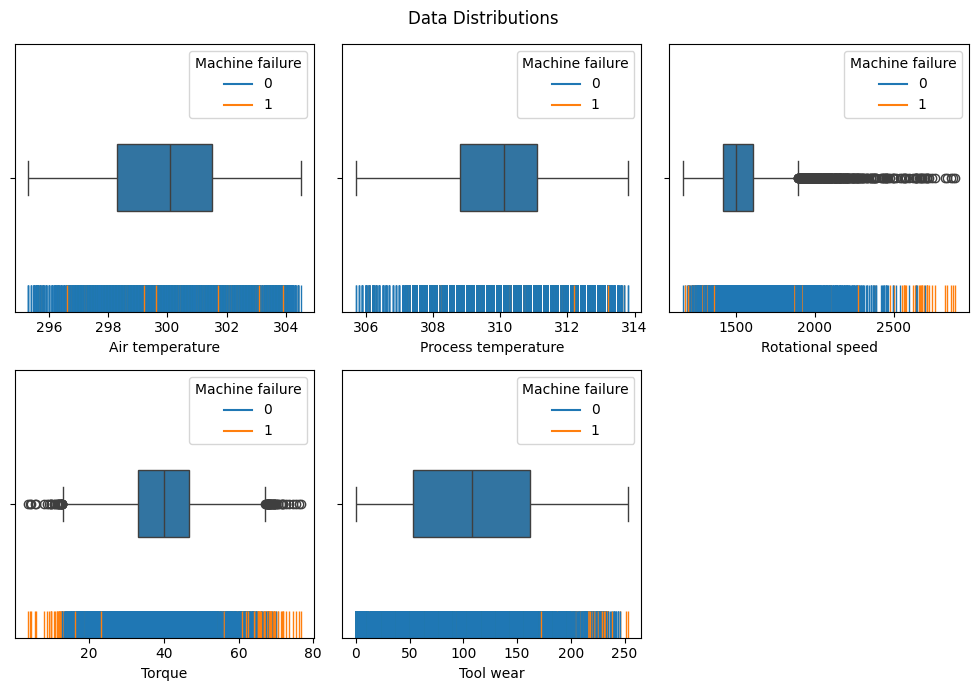

In [ ]:
plt.figure(figsize = (10,7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.rugplot(data=data, x = col, height = 0.1, hue = label)
    sns.boxplot(data=data, x = col, width = 0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

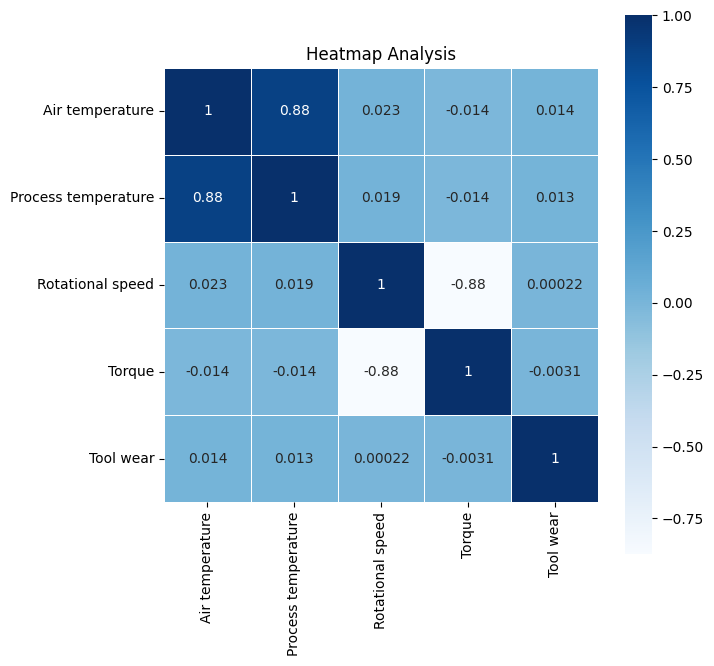

In [ ]:
plt.figure(figsize = (7,7))
sns.heatmap(data[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

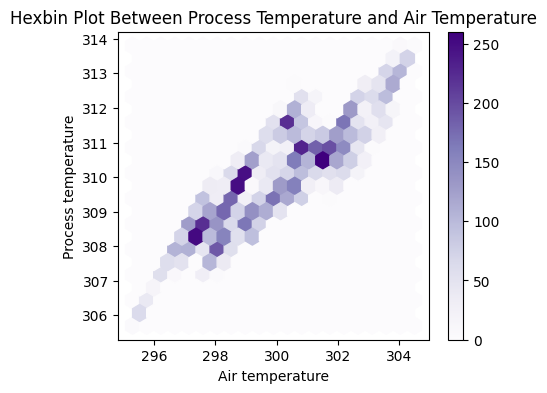

In [ ]:
data.plot.hexbin(x='Air temperature', y='Process temperature', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

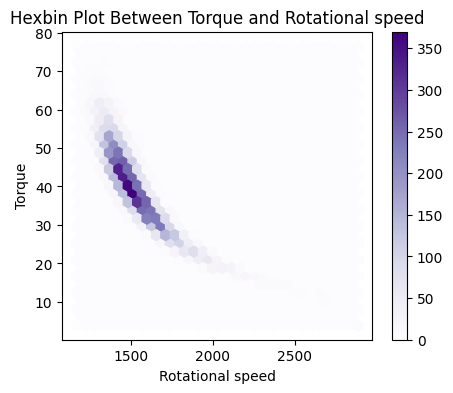

In [ ]:
data.plot.hexbin(x='Rotational speed', y='Torque', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

In [ ]:
type_machine_failure = data[['Type', 'Machine failure']].pivot_table(index = 'Type', columns='Machine failure', aggfunc= lambda x: len(x), margins = True)

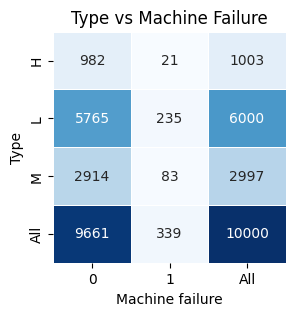

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

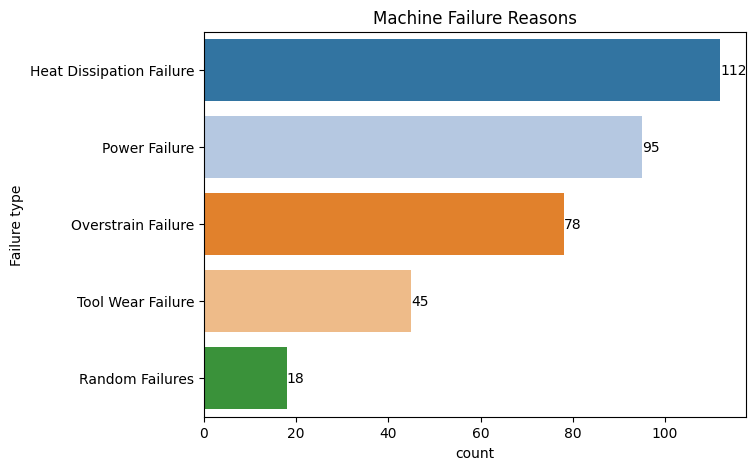

In [ ]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data=data[data['Failure type'] != 'No Failure'], y = "Failure type", palette = 'tab20', order=data[data['Failure type'] != 'No Failure']['Failure type'].value_counts().index)
plt.title("Machine Failure Reasons")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.show()

In [ ]:
data['Power'] = 2 * np.pi * data['Rotational speed'] * data['Torque'] / 60

In [ ]:
data['temp_diff'] = data['Process temperature'] - data['Air temperature']

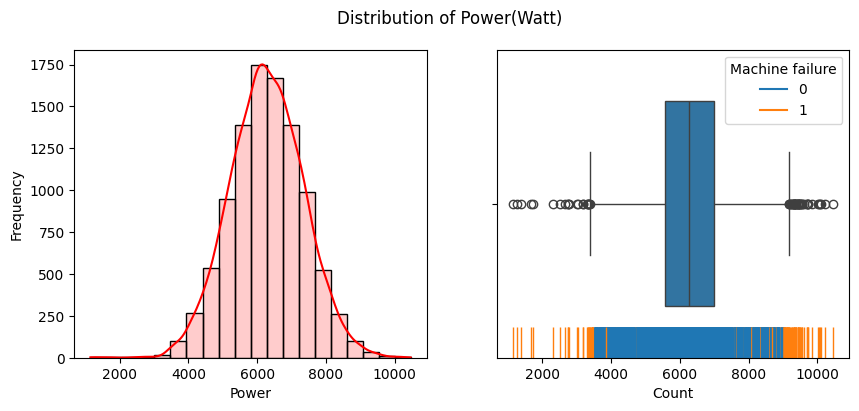

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data=data['Power'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = data['Power'], ax = ax[1], width = 0.25)
sns.rugplot(data=data, x = 'Power', hue = 'Machine failure', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Power(Watt)")

fig.show()

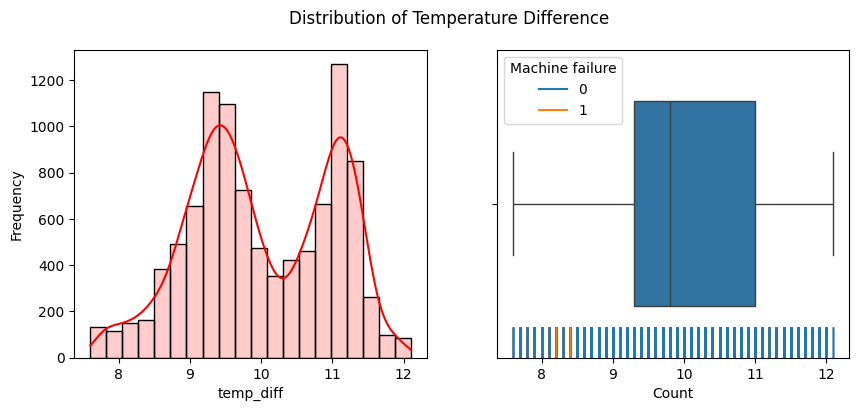

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data=data['temp_diff'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = data['temp_diff'], ax = ax[1], width = 0.25)
sns.rugplot(data=data, x = 'temp_diff', hue = 'Machine failure', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Temperature Difference")

fig.show()

### DATA PREPROCESSING




In [ ]:
# UDI and Product ID are high cardinality features, Removing Process Temperature due to multi-collinearity
data = data.drop(['UDI', 'Product ID', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Failure type'], axis = 1)

### ONE HOT CODING

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data[['Type_H', 'Type_L', 'Type_M']] = data[['Type_H', 'Type_L', 'Type_M']].astype('int')

In [ ]:
data.head()

,Tool wear,Machine failure,Power,temp_diff,Type_H,Type_L,Type_M
0,0,0,6951.590560,10.5,0,0,1
1,3,0,6826.722724,10.5,0,1,0
2,5,0,7749.387543,10.4,0,1,0
3,7,0,5927.504659,10.4,0,1,0
4,9,0,5897.816608,10.5,0,1,0


In [ ]:
# Machine Learning Model Building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into train and test sets
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.77      0.59      0.67        61

    accuracy                           0.98      2000
   macro avg       0.88      0.79      0.83      2000
weighted avg       0.98      0.98      0.98      2000

[[1928   11]
 [  25   36]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Perform cross-validation to get accuracy scores
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

# Print the mean accuracy score
print("Mean Accuracy of Random Forest Classifier:", cv_scores_rf.mean())

Mean Accuracy of Random Forest Classifier: 0.9375


### Adaptive Boosting


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into train and test sets
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Evaluating the model
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.62      0.43      0.50        61

    accuracy                           0.97      2000
   macro avg       0.80      0.71      0.75      2000
weighted avg       0.97      0.97      0.97      2000

[[1923   16]
 [  35   26]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
ada_model = AdaBoostClassifier()

# Perform cross-validation to get accuracy scores
cv_scores_ada = cross_val_score(ada_model, X, y, cv=5)

# Print the mean accuracy score
print("Mean Accuracy of AdaBoost Classifier:", cv_scores_ada.mean())

Mean Accuracy of AdaBoost Classifier: 0.933


### Cat Boosting

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into train and test sets
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train, y_train, verbose=0)  # verbose=0 to suppress output

# Evaluating the model
y_pred = catboost_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.69      0.59      0.64        61

    accuracy                           0.98      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.98      0.98      0.98      2000

[[1923   16]
 [  25   36]]


In [ ]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=0)

# Perform cross-validation to get accuracy scores
cv_scores_catboost = cross_val_score(catboost_model, X, y, cv=5)

# Print the mean accuracy score
print("Mean Accuracy of CatBoost Classifier:", cv_scores_catboost.mean())

Mean Accuracy of CatBoost Classifier: 0.9393


### Gardient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and training the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluating the model
y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.77      0.56      0.65        61

    accuracy                           0.98      2000
   macro avg       0.88      0.78      0.82      2000
weighted avg       0.98      0.98      0.98      2000

[[1929   10]
 [  27   34]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to get accuracy scores
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5)

# Print the mean accuracy score
print("Mean Accuracy of Gradient Boosting Classifier:", cv_scores_gb.mean())

Mean Accuracy of Gradient Boosting Classifier: 0.9411999999999999


### XG Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into train and test sets
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluating the model
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.63      0.52      0.57        61

    accuracy                           0.98      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg       0.97      0.98      0.97      2000

[[1920   19]
 [  29   32]]


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier()

# Perform cross-validation to get accuracy scores
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5)

# Print the mean accuracy score
print("Mean Accuracy of XGBoost Classifier:", cv_scores_xgb.mean())

Mean Accuracy of XGBoost Classifier: 0.9511


In [48]:
import pickle

# Train Gradient Boosting model
xgb_model.fit(X, y)

# Dump Gradient Boosting model into a pickle file
with open('XG_boosting_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [49]:
import pickle

# Assuming gb_model is your trained Gradient Boosting model
with open('XG_boosting_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [50]:
# Test Case
test_data = {
    'Tool wear': [30],
    'Power': [4000],
    'temp_diff': [50],
    'Type_H': [1],
    'Type_L': [0],
    'Type_M': [0]
}

# Define class labels
class_labels = {
    0: 'No Failure',
    1: 'Failure'
}


# Convert the dictionary into a DataFrame
test_df = pd.DataFrame(test_data)

# Make predictions using the Gradient Boosting model
xgb_prediction = xgb_model.predict(test_df)
xgb_prediction_label = [class_labels[pred] for pred in xgb_prediction]
print("XG Boosting Model Prediction:", xgb_prediction_label)

XG Boosting Model Prediction: ['No Failure']
